In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from jupyterthemes import jtplot
jtplot.style()

import Functions as fun

Let's get everything from previous notebooks:

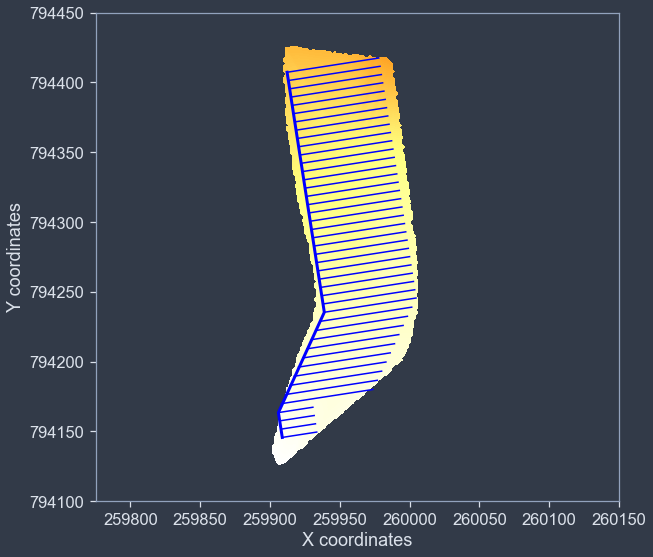

In [2]:
lines = fun.import_lines()
main_line = fun.import_main_line()
fun.plot_map(False, False) # Plotting map
plt.grid(b=False)

for line in lines: # Plotting drip lines
    line = line.reshape(2,2)
    plt.plot(line[:,0],line[:,1],c='blue')

plt.plot(main_line[:,0],main_line[:,1],c='blue',lw=3) # Plotting main line

Now we set the final model to calculate all of the emitter pressure and flow. The parameters are:

### Drip Line Parameters
TifDrip (no pressure compensating) 16/1(1.0 mm)
* Drip space = 0.4 m
* $D_\text{drip}$ = 0.016 m
* $C_\text{drip} = 140$ (Assuming that the material is polyethylen)
* a = 0.999
* x = 0.478

According to 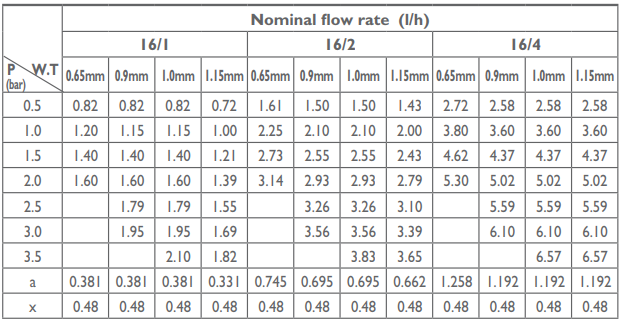

### Main Line Parameters
Lay Flat PVC (SF55)
* $D_\text{main}$ = 0.0381 m
* $C_\text{main} = 150$ (PVC)

According to 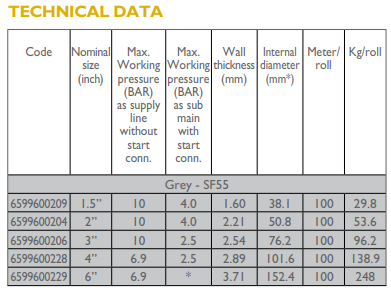

In [3]:
s = fun.System(lines,
               C_main=150,
               D_main=np.repeat(0.0381,43),
               C_drip=140,
               D_drip=0.016,
               space_drip=0.4,
               a=0.999,
               x=0.478)
s.estimate(30)

In [4]:
q_emitters = pd.DataFrame(s.q_emitters[::-1],
                         columns=['E{}'.format(i) for i in range(1,166)],
                         index=['L{}'.format(i) for i in range(1,45)]) * 1000 * 3600 # [l/h]
q_emitters

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E156,E157,E158,E159,E160,E161,E162,E163,E164,E165
L1,1.672849,1.672926,1.672998,1.673064,1.673124,1.673178,1.673225,1.673266,1.673300,1.673327,...,1.617569,1.616847,1.617307,1.617810,1.618033,1.618005,1.617753,1.617307,1.616695,1.616036
L2,1.654423,1.654539,1.654652,1.654761,1.654866,1.654967,1.655064,1.655156,1.655243,1.655325,...,1.604734,1.604791,1.604643,1.604320,1.603849,1.603259,1.602589,1.601920,1.601267,1.600629
L3,1.636750,1.636865,1.636991,1.637125,1.637258,1.637389,1.637517,1.637643,1.637766,1.637886,...,1.593030,1.592533,1.591967,1.591359,1.590745,1.590151,1.589578,1.589026,1.588497,1.587978
L4,1.619963,1.620055,1.620158,1.620272,1.620395,1.620528,1.620668,1.620810,1.620951,1.621091,...,1.581551,1.580983,1.580389,1.579757,1.579078,1.578341,1.577536,1.576652,1.575680,1.574608
L5,1.604052,1.604123,1.604204,1.604296,1.604397,1.604507,1.604625,1.604751,1.604884,1.605023,...,1.568929,1.567716,1.566368,1.564875,1.563397,1.563249,1.564372,1.565490,1.565883,1.565649
L6,1.588998,1.589048,1.589109,1.589180,1.589260,1.589349,1.589446,1.589550,1.589662,1.589779,...,1.560766,1.560810,1.560469,1.559908,1.559241,1.558725,1.558457,1.558014,1.556902,1.555327
L7,1.574780,1.574811,1.574853,1.574904,1.574965,1.575034,1.575111,1.575195,1.575286,1.575383,...,1.553572,1.552886,1.551704,1.550220,1.548841,1.547866,1.547505,1.547566,1.547814,1.548175
L8,1.561375,1.561389,1.561413,1.561446,1.561489,1.561540,1.561598,1.561664,1.561736,1.561813,...,1.542700,1.542607,1.542735,1.542984,1.543277,1.543551,1.543751,1.543818,1.543669,1.543216
L9,1.548760,1.548758,1.548766,1.548783,1.548810,1.548844,1.548885,1.548930,1.548978,1.549028,...,1.538793,1.538953,1.539041,1.538995,1.538705,1.538214,1.537627,1.537011,1.536370,1.535745
L10,1.536911,1.536895,1.536888,1.536891,1.536897,1.536908,1.536921,1.536938,1.536958,1.536981,...,1.533505,1.533112,1.532700,1.532269,1.531821,1.531357,1.530910,1.530668,1.530620,1.530631


In [5]:
# The maximum deviation
(np.nanmax(q_emitters) - np.nanmin(q_emitters)) / np.nanmean(q_emitters) * 100 # [%]

15.126138257616844